# 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
import missingno as msno

In [14]:
titanic = sns.load_dataset("titanic")

In [5]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


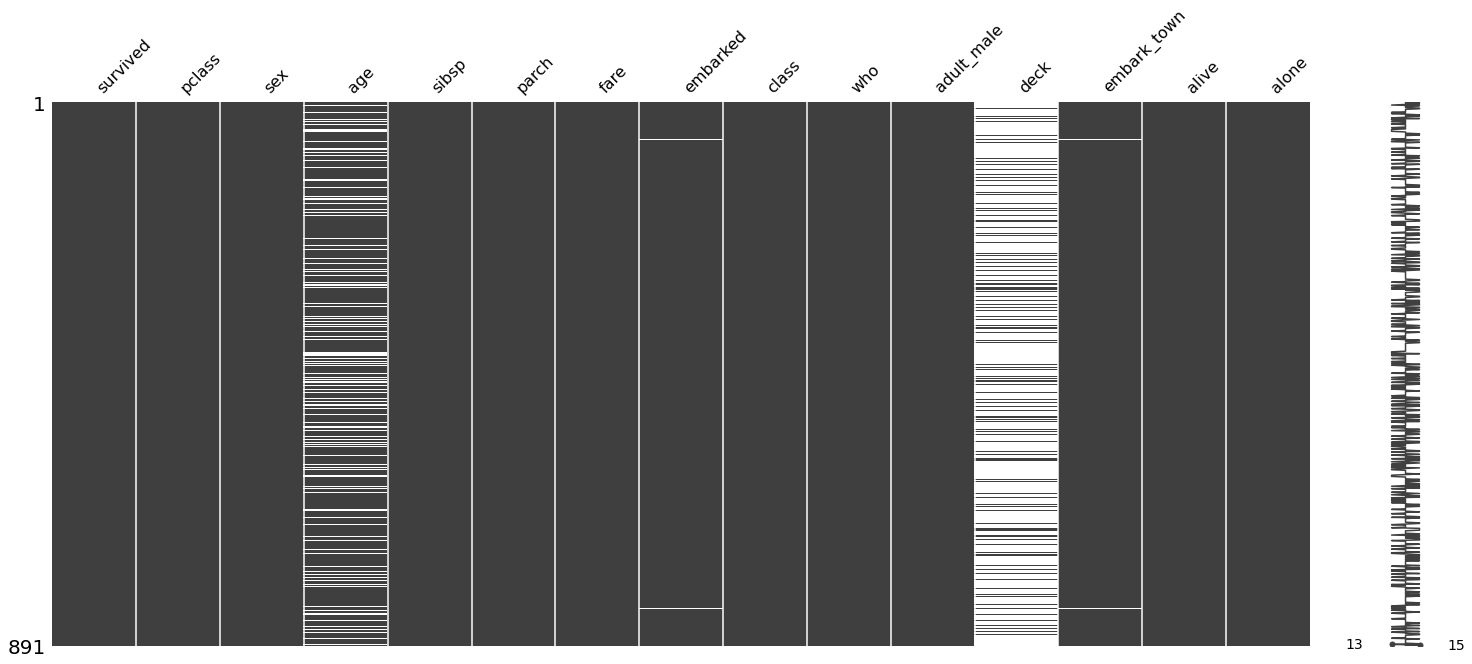

In [10]:
msno.matrix(titanic)
plt.show()

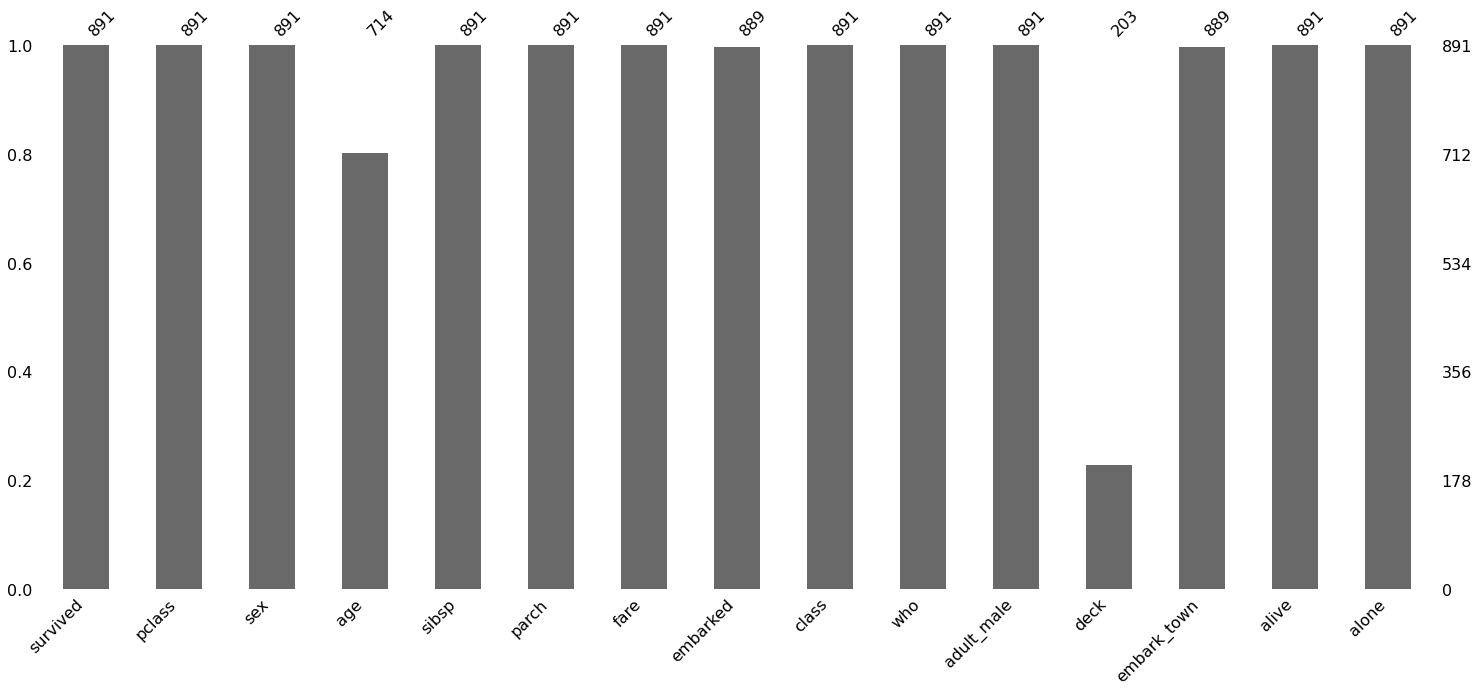

In [9]:
msno.bar(titanic)
plt.show()

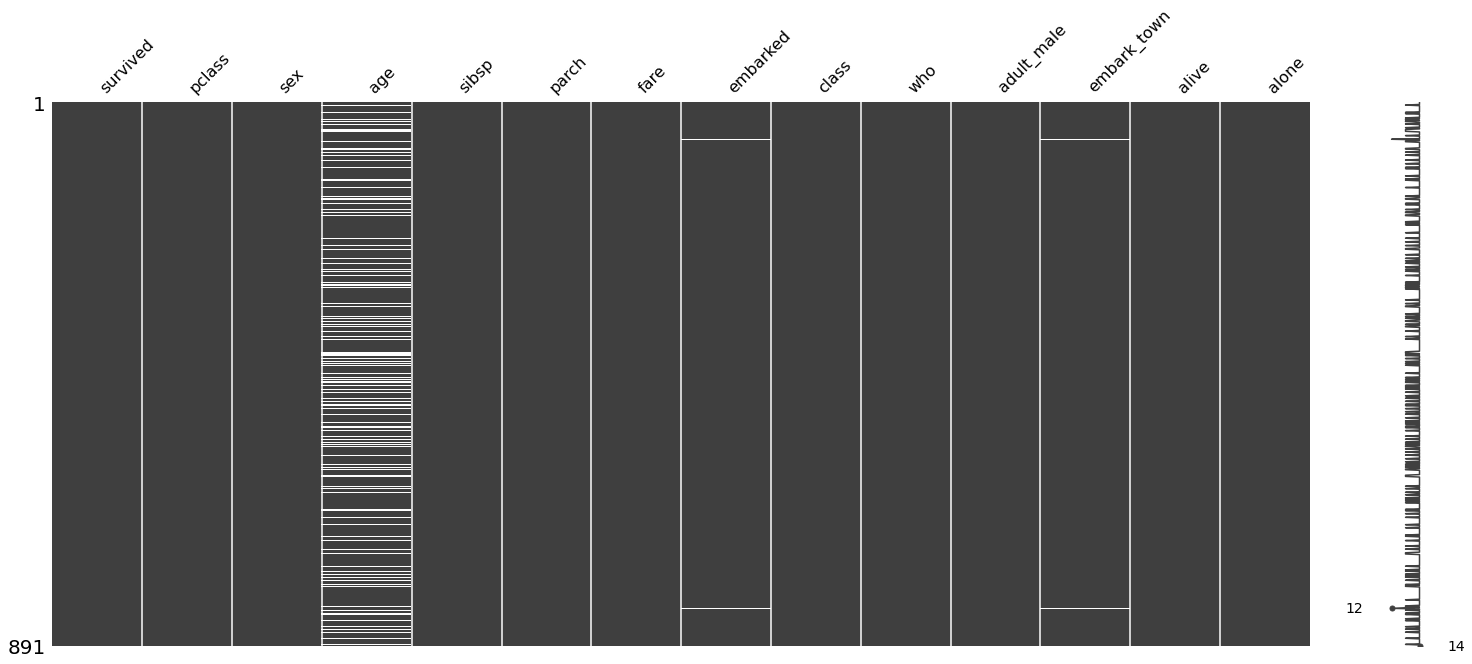

In [14]:
titanic2 = titanic.dropna(thresh=int(len(titanic)*0.5), axis = 1)
msno.matrix(titanic2)
plt.show()

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
titanic["embark_town"]

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


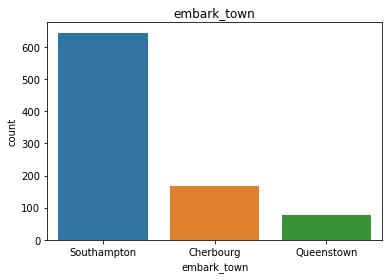

In [20]:
sns.countplot(titanic.embark_town)
plt.title("embark_town")
plt.show()

In [41]:
titanic3 = titanic2
imputer_embark_town = SimpleImputer(strategy = "most_frequent")
titanic["embark_town"] = imputer_embark_town.fit_transform(titanic2[["embark_town"]])
titanic["embarked"] = imputer_embark_town.fit_transform(titanic[["embarked"]])

<AxesSubplot:>

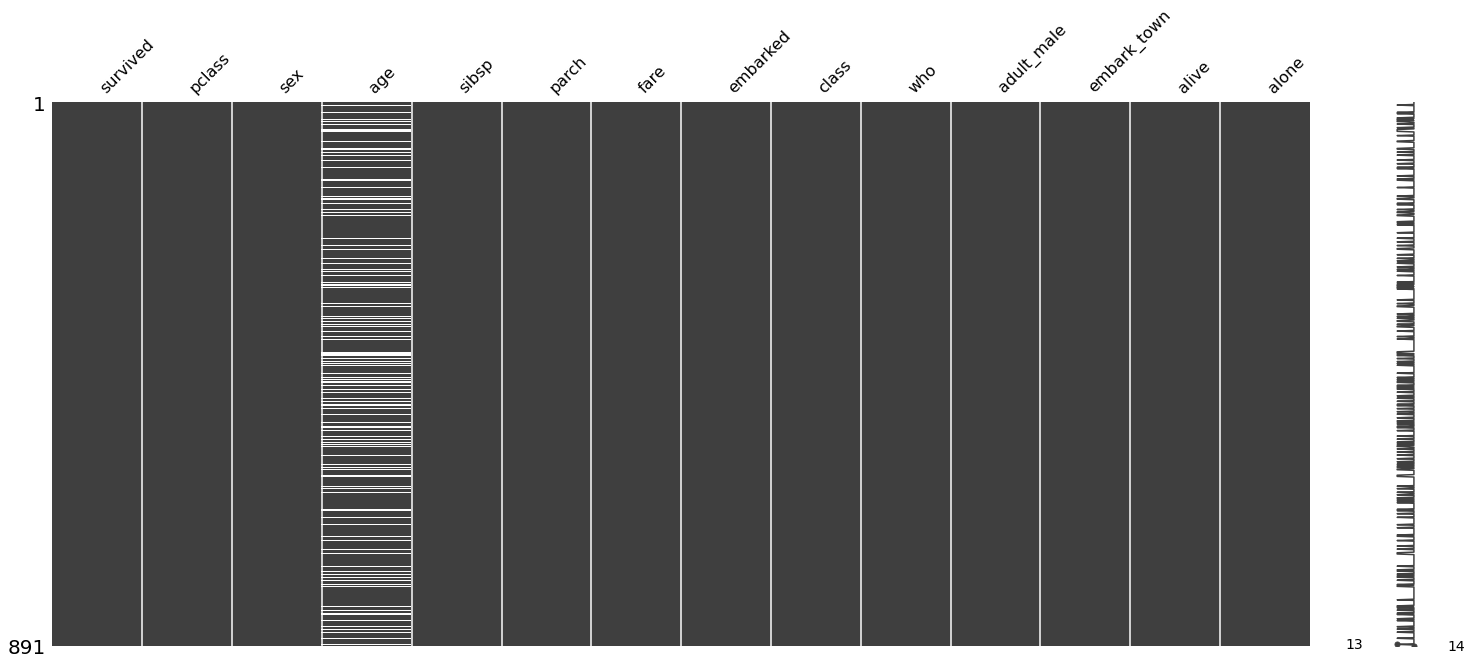

In [38]:
msno.matrix(titanic3)

In [31]:
titanic.iloc(embark_town)

NameError: name 'embark_town' is not defined

In [35]:
titanic.loc[:,"embark_town"]

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: embark_town, Length: 891, dtype: object

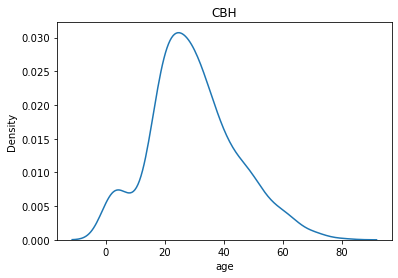

In [42]:
sns.kdeplot(titanic.age)
plt.title("CBH")
plt.show()

In [49]:
titanic3 = titanic2
imputer_age = SimpleImputer(strategy = "median")
titanic3.loc[:,"age"] = imputer_age.fit_transform(titanic2[["age"]]) 

C:\Users\UserK\AppData\Local\Temp\ipykernel_4088\396162891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic3.loc[:,"age"] = imputer_age.fit_transform(titanic2[["age"]])


In [53]:
titanic2.loc[:,"age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

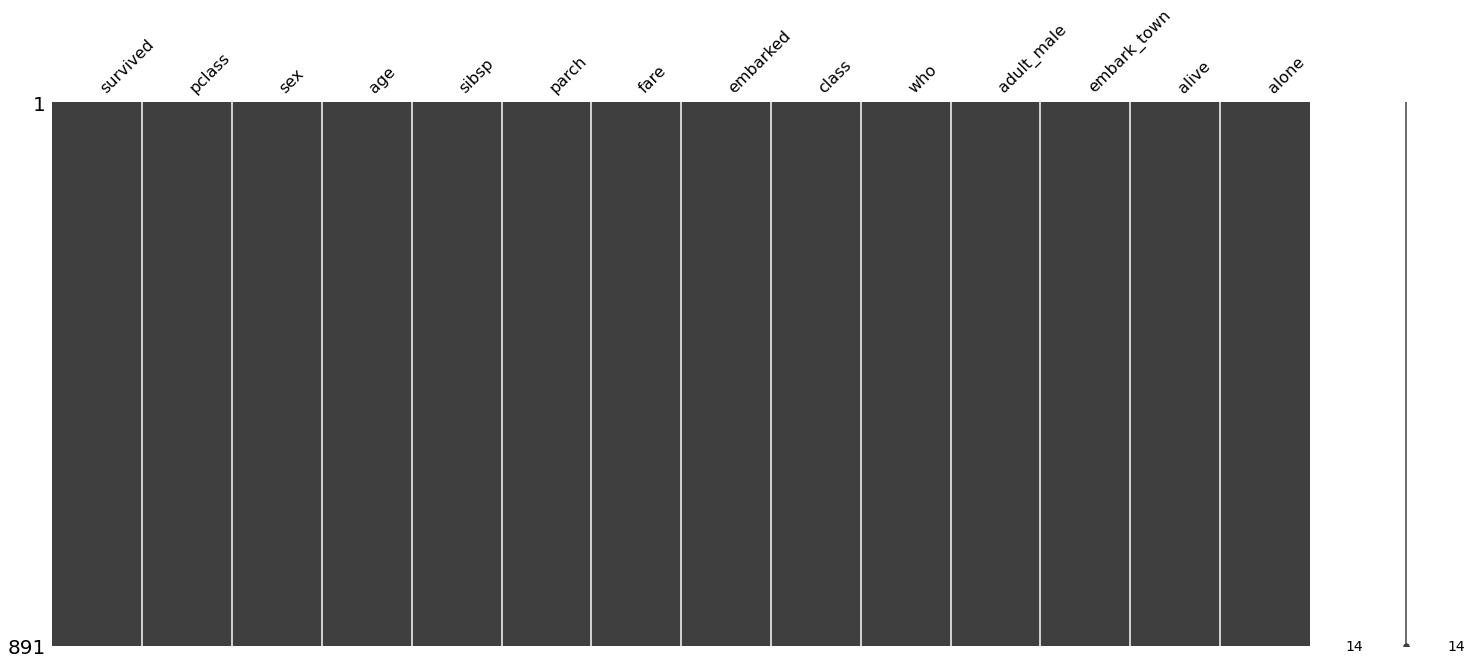

In [54]:
msno.matrix(titanic3)
plt.show()

## patsy 패키지

In [58]:
import patsy
from patsy import demo_data

df = pd.DataFrame(demo_data("x1", "x2", "x3", "x4", "x5"))
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [17]:
from patsy import dmatrix
dmatrix("x1 + 0", data=df)

NameError: name 'df' is not defined

In [89]:
dm = dmatrix("x1 + center(x1)+0",data=df)
dm.design_info.factor_infos

{EvalFactor('x1'): FactorInfo(factor=EvalFactor('x1'),
            type='numerical',
            state=<factor state>,
            num_columns=1),
 EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

In [70]:
demo_data("x1")

{'x1': array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])}

In [80]:
dmatrix("x1 + np.sum(df,axis=1)", data=df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.sum(df, axis=1)
          1  1.76405            -1.28850
          1  0.40016             4.95222
          1  0.97874             2.24770
          1  2.24089             1.83025
          1  1.86756             4.13768
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.sum(df, axis=1)' (column 2)

In [79]:
np.sum(df,axis=1)

0   -1.288497
1    4.952217
2    2.247696
3    1.830252
4    4.137679
dtype: float64

In [83]:
dmatrix("x1+x2+ x1:x2 + 0",data=df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

In [86]:
df.design_info.factor_infos

AttributeError: 'DataFrame' object has no attribute 'design_info'

# sklearn.preprocessing

In [94]:
X = np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [98]:
from sklearn.preprocessing import StandardScaler
X = np.arange(7).reshape(-1,1)
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [99]:
X2 = np.vstack([X, [[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [100]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [112]:
np.quantile(X2,0.99)

930.4199999999997

In [8]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(7).reshape(-1,1)
poly = PolynomialFeatures(degree=3)
poly.fit_transform(X)

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.],
       [  1.,   6.,  36., 216.]])

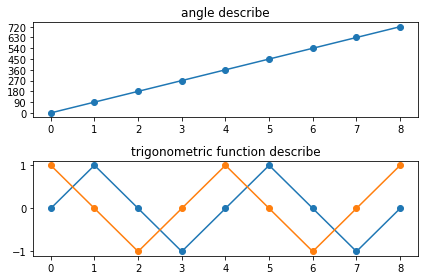

In [11]:
from sklearn.preprocessing import FunctionTransformer
X = 90 * np.arange(9).reshape(-1, 1) 
X
def degree2sincos(X):
    x0 = np.sin(X * np.pi / 180)
    x1 = np.cos(X * np.pi / 180)
    X_new = np.hstack([x0, x1])
    return X_new

X2 = FunctionTransformer(degree2sincos).fit_transform(X)

plt.subplot(211)
plt.plot(X, marker="o")
plt.yticks(X.flatten())
plt.title("angle describe")
plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("trigonometric function describe")
plt.tight_layout()
plt.show()

In [15]:
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [19]:
dmatrix("embark_town+0",data = titanic)

DesignMatrix with shape (889, 3)
  embark_town[Cherbourg]  embark_town[Queenstown]  embark_town[Southampton]
                       0                        0                         1
                       1                        0                         0
                       0                        0                         1
                       0                        0                         1
                       0                        0                         1
                       0                        1                         0
                       0                        0                         1
                       0                        0                         1
                       0                        0                         1
                       1                        0                         0
                       0                        0                         1
                       0                        0      